# Pru Wealth Data Test

Below we will explore a mock database of customers, policies and funds that are similar to the Pru Wealth data. The first section of this notebook will test your SQL skills, the second section will test your Python skills and visualisation skills.

The database file is called Prudential_Data.db

The three tables included in this database are:
* Customer_Table
* Policy_Table
* Fund_Table

You will need to have the following packages installed in your Python environment:
* numpy
* pandas
* sqlite3

For visualization use any package of your choice (e.g., matplotlib, seaborn, plotly).

Please complete and return the test before the deadline by emailing your copy of this notebook to: Denholm.Hesse@Prudential.co.uk. If you do not know the answer to a question feel free to use Google and Stack Overflow. This is to give you the option to teach yourself a concept from the internet to address a question which you do not know the answer to, please refrain from skipping questions. The test is meant to be completed by you only.

Good luck and have fun!

In [539]:
import numpy as np
import pandas as pd
import sqlite3

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

print('Libraries Loaded')

Libraries Loaded


# SQL test

IMPORANT: Please make sure all questions in this section are solved using SQL by only editing the content of the variable *sqlite_query*. Please do not edit the below cell:

In [7]:
# Establish DB connection
conn = sqlite3.connect('Prudential_Data.db')

print('Connection Established')

Connection Established


Below is an example of how to query the SQLlite databse from this Jupyter notebook. Please note that SQLlite might have a slightly different syntax from the SQL you normally use. Please do not edit the below cell:

In [18]:
sqlite_query = """
SELECT COUNT(*) 
from policy_table 
"""

pd.read_sql(sqlite_query, conn)



,COUNT(*)
0,1635


The first table "Customer_Table" contains personal information about the customers. Please do not edit the below cell:

In [19]:
sqlite_query = """
SELECT * 
from Customer_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Customer ID,Email,Gender,Age,Postcode
0,0,CO183683,NLUPPITT14@PARALLELS.COM,Male,90,None
1,1,CO314757,None,Female,90,None
2,2,CO720602,None,Female,90,None
3,3,CO34804,None,Female,90,1495-701
4,4,CO474411,None,Male,90,301288


The second table "Policy_Table" contains data relating to customer policies. The policy value is the current value of the policy. Please do not edit the below cell:

In [20]:
sqlite_query = """
SELECT * 
from Policy_Table 
limit 5
"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date
0,0,RET100072,CO276506,RETIREMENT,RETIREMENT ACCOUNT,270033.0,2016-01-02 00:00:00
1,1,RET100931,CO831289,RETIREMENT,RETIREMENT ACCOUNT,26394.0,2016-01-04 00:00:00
2,2,RET100682,CO784249,RETIREMENT,RETIREMENT ACCOUNT,773567.0,2016-01-04 00:00:00
3,3,RET100447,CO295533,RETIREMENT,RETIREMENT ACCOUNT,35512.0,2016-01-07 00:00:00
4,4,RET100390,CO901735,RETIREMENT,RETIREMENT ACCOUNT,767580.0,2016-01-08 00:00:00


The final table "Fund_Table" contains historic data on the Policy Value (Policy_Value_Snapshot). The Policy_Value_Snapshot represents the value of the policy and the Date column is the date at which that value was recorded. The value may have changed overtime due to changes in the fund price or quanity of units the policy was invested in. Please do not edit the below cell:

In [106]:
sqlite_query = """
SELECT 
*
from Fund_Table


"""

pd.read_sql(sqlite_query, conn)

,index,Policy Number,Customer ID,Date,Product Category,Product Name,Policy_Value_Snapshot
0,0,ANN1221,CO408564,2009-10-31 00:00:00,ANNUITY,STANDARD ANNUITY,NaN
1,1,ANN1221,CO408564,2009-11-30 00:00:00,ANNUITY,STANDARD ANNUITY,NaN
2,2,ANN1221,CO408564,2009-12-31 00:00:00,ANNUITY,STANDARD ANNUITY,NaN
3,3,ANN1221,CO408564,2010-01-31 00:00:00,ANNUITY,STANDARD ANNUITY,NaN
4,4,ANN1221,CO408564,2010-02-28 00:00:00,ANNUITY,STANDARD ANNUITY,NaN
...,...,...,...,...,...,...,...
72116,72116,RET100998,CO213842,2018-11-30 00:00:00,RETIREMENT,RETIREMENT ACCOUNT,470727.090909
72117,72117,RET100998,CO213842,2018-12-31 00:00:00,RETIREMENT,RETIREMENT ACCOUNT,520272.545455
72118,72118,RET100998,CO213842,2019-01-31 00:00:00,RETIREMENT,RETIREMENT ACCOUNT,569818.000000
72119,72119,RET100999,CO936943,2018-12-31 00:00:00,RETIREMENT,RETIREMENT ACCOUNT,490378.500000


If a question requires additional explanation for your answer, please add additional cells below the code. 

## Q1: What is the current average policy value split by each product name? 

In [153]:
import numpy as np

sqlite_query = """SELECT [Product Name], AVG([Policy Value]) Avg_Current_Policy_Value
FROM Policy_Table 
GROUP BY [Product Name] --HAVING [Product Name] = 'NHS PENSION'
ORDER BY [Product Name]
"""

df=pd.read_sql(sqlite_query, conn)

df["Avg_Current_Policy_Value"].replace(np.nan, '0', inplace=True)

print(df)

                 Product Name Avg_Current_Policy_Value
0        CORPORATE MEMBERSHIP                  5697.29
1                FOCUSSED ISA                  5746.34
2                 NHS PENSION                   5241.5
3                    PRU BOND                  4516.39
4  PRUDENTIAL INVESTMENT PLAN                  5084.52
5              PRUDENTIAL ISA                  5161.14
6          RETIREMENT ACCOUNT                   504965
7                        SIPP                  5335.84
8            STANDARD ANNUITY                        0


## Q2: How many customers opened a new policy in Q1 2017 who already had an existing pension product? 

In [78]:
sqlite_query = """SELECT 
CASE 
    WHEN CAST(strftime('%m', [Policy Start Date]) as integer) BETWEEN 1 AND 3 THEN 1 
    WHEN CAST(strftime('%m', [Policy Start Date]) as integer) BETWEEN 4 AND 6 THEN 2
    WHEN CAST(strftime('%m', [Policy Start Date]) as integer) BETWEEN 7 AND 9 THEN 3
    ELSE 4
END as Qtr, 
strftime('%Y', [Policy Start Date]) as Year, * 
FROM Policy_Table 
WHERE
    strftime('%m', [Policy Start Date]) in ('01', '02', '03') 
    AND strftime('%Y', [Policy Start Date]) = '2017' 
    AND [Customer ID] IN (SELECT DISTINCT [Customer ID] 
                            from Policy_Table 
                            WHERE 
                            [Product Name] like '%Pension%')

"""

pd.read_sql(sqlite_query, conn)

,Qtr,Year,index,Policy Number,Customer ID,Product Category,Product Name,Policy Value,Policy Start Date
0,1,2017,352,RET100207,CO55494,RETIREMENT,RETIREMENT ACCOUNT,724367.0,2017-01-30 00:00:00
1,1,2017,353,RET100930,CO163919,RETIREMENT,RETIREMENT ACCOUNT,553463.0,2017-01-30 00:00:00
2,1,2017,354,RET100012,CO760027,RETIREMENT,RETIREMENT ACCOUNT,687770.0,2017-01-31 00:00:00
3,1,2017,355,RET100500,CO143604,RETIREMENT,RETIREMENT ACCOUNT,76598.0,2017-02-02 00:00:00


# Q2 - Assumptions

1. Get the customer list who have already have existing pension policy in Policy_Table. So filtering data by "Product Category=Pension". So using subquery I have extracted that CustomerIDs.

2. A main query where Policy data has been filtered out by QTR (calculated based on month), Year and CustomerIDs (used above subquery logic to get the customer list who already have pension plan).

3. Assuming that new policy can also other than pension policy.

4. Assuming that we want only the list of new policy. That is why existing pension policy has not been included into the result set.

## Q3: What was the customer ID that had the biggest difference in policy value between its earliest and latest date (for any product) ?

In [112]:
sqlite_query = """SELECT * FROM
(
    SELECT T1.[Customer ID], T1.MaxDate, T1.Policy_Value_MaxDt, T2.MinDate, T2.Policy_Value_MinDt, 
    (T1.Policy_Value_MaxDt - T2.Policy_Value_MinDt) AS Policy_Value_Diff  FROM
    (
        SELECT [Customer ID], Max(Date) as MaxDate, Policy_Value_Snapshot AS Policy_Value_MaxDt FROM Fund_Table TMax
        GROUP BY [Customer ID]
    ) T1
    INNER JOIN
    (
        SELECT [Customer ID], Min(Date) as MinDate, Policy_Value_Snapshot AS Policy_Value_MinDt FROM Fund_Table TMin
        GROUP BY [Customer ID]
    ) T2 ON T1.[Customer ID]=T2.[Customer ID]
) Final
ORDER BY Policy_Value_Diff DESC
limit 1
"""

pd.read_sql(sqlite_query, conn)

,Customer ID,MaxDate,Policy_Value_MaxDt,MinDate,Policy_Value_MinDt,Policy_Value_Diff
0,CO687603,2019-01-31 00:00:00,989049.0,2017-12-31 00:00:00,93691.642857,895357.357143


# Q3 - Details

[customer ID] - CO687603 had the biggest difference in policy value (895357.357143) between its earliest (2017-12-31 00:00:00) and latest date (2019-01-31 00:00:00) (for any product)

# Python Test

Same data, but now let's have some fun in python. Please do not use SQL for this part of the exercise. 

Feel free to add more cells of code or text

In [148]:
Customer_Table = pd.read_sql('SELECT * FROM Customer_Table', conn)
Policy_Table = pd.read_sql('SELECT * FROM Policy_Table', conn)
Fund_Table = pd.read_sql('SELECT * FROM Fund_Table', conn)

print('All value has been assigned successfully..')
print(Customer_Table)

All value has been assigned successfully..
     index Customer ID                           Email  Gender  Age  Postcode
0        0    CO183683        NLUPPITT14@PARALLELS.COM    Male   90      None
1        1    CO314757                            None  Female   90      None
2        2    CO720602                            None  Female   90      None
3        3     CO34804                            None  Female   90  1495-701
4        4    CO474411                            None    Male   90    301288
..     ...         ...                             ...     ...  ...       ...
994    994    CO957494  CFRAMMINGHAM37@STUMBLEUPON.COM  Female   27     92736
995    995    CO503828      RRICCIARDELLI38@GOOGLE.COM    Male   24      None
996    996    CO340813           ODYZARTMY@SAMSUNG.COM    Male   22      None
997    997    CO403019          VENDLENT@MICROSOFT.COM  Female   22    735 41
998    998    CO274837       IOFIHILLIEDJ@BLOGSPOT.COM    Male   20      8306

[999 rows x 6 column

## Q4: Produce a list of customers which have an invalid email address. What do you notice about these customers? ##

Feel free to use any packages of your choice

In [192]:
#Insert your answer below: 

import re

print('"re" package loaded.')


#print(Customer_Table['Email'].astype('str').tolist())


"re" package loaded.


In [418]:
pattern = re.compile(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)")  # this is the regex expression to search on

df_ct = pd.DataFrame({'email': Customer_Table['Email'].astype('str').tolist(), 'Customer ID' : Customer_Table['Customer ID'].astype('str').tolist()})
df_ct['isemail'] = df_ct['email'].apply(lambda x: True if pattern.match(x) else False)

#print(df_ct)

df_ct_filter= df_ct[df_ct['isemail']==False]

#print(df_ct_filter)

print(Customer_Table[Customer_Table['Customer ID'].isin(df_ct_filter['Customer ID'].astype('str').tolist())])

     index Customer ID                     Email  Gender  Age        Postcode
1        1    CO314757                      None  Female   90            None
2        2    CO720602                      None  Female   90            None
3        3     CO34804                      None  Female   90        1495-701
4        4    CO474411                      None    Male   90          301288
5        5    CO777973                      None  Female   90            None
6        6    CO311505                      None    Male   90            None
7        7    CO474987                      None  Female   89            None
8        8    CO496581                      None  Female   89       36520-000
9        9    CO862381                      None    Male   89            8301
22      22    CO401070                      None  Female   88            None
28      28    CO131348                      None    Male   88            None
29      29    CO494489                      None  Female   88   

## Q5: The Managing Director of Pru Wealth needs to see how policy value differs between other variables in the database (e.g. customer demographics) . They don't have time to read a report, so have asked for a cool visualisation that tells a story.

Visualise something cool, tell us a story! You can use packages like Matplotlib, Seaborn or Plotly.Tell us why you chose to visualise the data in this way and how it can be used from a business perspective.


###### Data Wrangling

Taking below field for analysis.

    1. Customer ID
    2. Gender
    3. Age
    4. Postcode
    5. Product Category
    6. Product Name
    7. Policy Value
    
 Note: Post code cannot be consider as it has missing values.

In [333]:
# Insert your answer below: 

#Customer_Table = pd.read_sql('SELECT * FROM Customer_Table', conn)
#Policy_Table = pd.read_sql('SELECT * FROM Policy_Table', conn)

df_cp = pd.read_sql('SELECT C.[Customer ID], C.Gender, C.Age, C.Postcode, P.[Product Category] as Product_Category, P.[Product Name] as Product_Name, P.[Policy Value] as Policy_Value FROM Customer_Table C INNER JOIN Policy_Table P on P.[Customer ID]=C.[Customer ID] ', conn)

df_cp

#df_cp.describe()



#Avg_Current_Policy_Value


#print("number of NaN values for the column Policy Value :", df_cp['Policy Value'].isnull().sum())

print('\nData type: \n') 
print(df_cp.dtypes)
print('\nGender counts \n')
print(df_cp['Gender'].value_counts())



Data type: 

Customer ID          object
Gender               object
Age                   int64
Postcode             object
Product_Category     object
Product_Name         object
Policy_Value        float64
dtype: object

Gender counts 

Male      827
Female    808
Name: Gender, dtype: int64


In [334]:
mean=df_cp['Policy_Value'].mean()
df_cp['Policy_Value'].replace(np.nan,mean, inplace=True)
df_cp

#Pre-processing
#As you can see, Address in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.

#df_cp = df_cp.drop(['Customer ID', 'Postcode'], axis=1)



,Customer ID,Gender,Age,Postcode,Product_Category,Product_Name,Policy_Value
0,CO183683,Male,90,None,RETIREMENT,RETIREMENT ACCOUNT,744154.000000
1,CO314757,Female,90,None,ANNUITY,STANDARD ANNUITY,335213.494382
2,CO314757,Female,90,None,RETIREMENT,RETIREMENT ACCOUNT,192389.000000
3,CO720602,Female,90,None,RETIREMENT,RETIREMENT ACCOUNT,904394.000000
4,CO34804,Female,90,1495-701,ANNUITY,STANDARD ANNUITY,335213.494382
...,...,...,...,...,...,...,...
1630,CO340813,Male,22,None,ISA,FOCUSSED ISA,7176.000000
1631,CO340813,Male,22,None,RETIREMENT,RETIREMENT ACCOUNT,533501.000000
1632,CO403019,Female,22,735 41,RETIREMENT,RETIREMENT ACCOUNT,280107.000000
1633,CO274837,Male,20,8306,ISA,PRUDENTIAL ISA,6740.000000


In [316]:
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\anuragsr\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.0                |           py37_0         3.1 MB  anaconda
    seaborn-0.9.0              |           py37_0         379 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following packages will be UPDATED:

  conda                      pkgs/main::conda-4.7.12-py37_0 --> anaconda::conda-4.9.0-py37_0

The following packages will be SUPERSEDED by a higher-priority channel:

  seaborn                                         pkgs/main --> anaconda




conda-4.9.0          | 3.1 MB    |            |   0% 
conda-4.9.0          | 3.1 MB    |            |   0% 
con



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [335]:
import random 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
import seaborn as sns

np.random.seed(0)



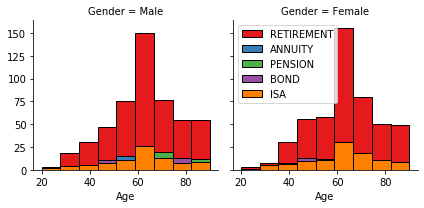

In [336]:
bins = np.linspace(df_cp.Age.min(), df_cp.Age.max(), 10)
g = sns.FacetGrid(df_cp, col="Gender", hue="Product_Category", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

###### Observation:

1. Most Customer opt for Rerirement Policy
2. Customer age > 60 invested lot in Retirement Policy.
3. Some of the customer whose age > 60 opt for Pension policy.
4. 122 customer who have policy value is zero.

###### Business Analysis and future strategy:

1. Company should do further analysis and design Product to target customer below <40 and try to acquire customer base and increase business.
2. To get clarity, we should do further analysis why other products like Annuity and Bond not performing same as retirement plan. See if we can tune the product and target particular segment of customer based on their demography (Age, Sex, Income).

In [395]:
df_cp = pd.read_sql('SELECT C.Gender, P.[Product Category] as Product_Category, Count(*) as PolicyCount FROM Customer_Table C INNER JOIN Policy_Table P on P.[Customer ID]=C.[Customer ID] GROUP BY C.Gender, P.[Product Category] ORDER BY C.Gender, P.[Product Category] ', conn)
#df_cp = pd.read_sql('SELECT P.[Product Name] as Product_Name, Count(*) as PolicyCount FROM Customer_Table C INNER JOIN Policy_Table P on P.[Customer ID]=C.[Customer ID] GROUP BY P.[Product Name]', conn)

df_cp

,Gender,Product_Category,PolicyCount
0,Female,ANNUITY,53
1,Female,BOND,80
2,Female,ISA,100
3,Female,PENSION,85
4,Female,RETIREMENT,490
5,Male,ANNUITY,69
6,Male,BOND,78
7,Male,ISA,85
8,Male,PENSION,86
9,Male,RETIREMENT,509


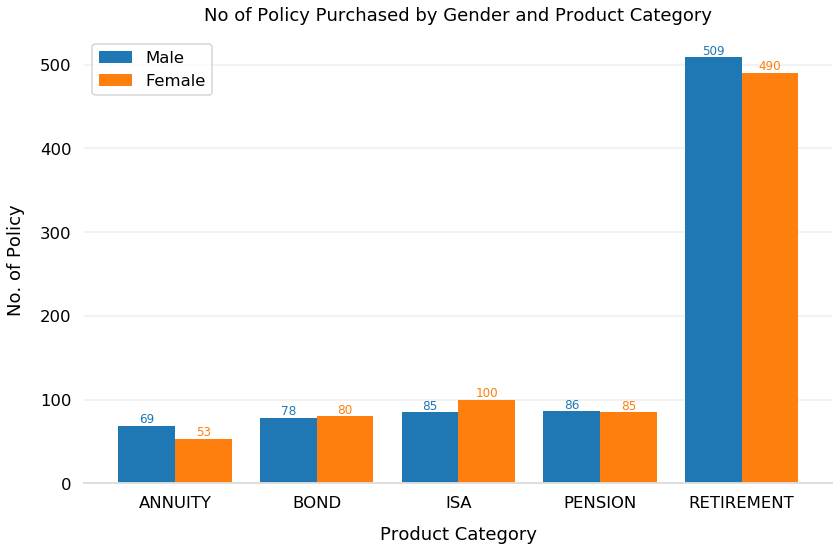

In [452]:
# Use Seaborn's context settings to make fonts larger.
import seaborn as sns
sns.set_context('talk')

# Create a grouped bar chart, with job as the x-axis
# and gender as the variable we're grouping on so there
# are two bars per job.
fig, ax = plt.subplots(figsize=(12, 8))

# Our x-axis. We basically just want a list
# of numbers from zero with a value for each
# of our jobs.
x = np.arange(len(df_cp.Product_Category.unique()))

# Define bar width. We need this to offset the second bar.
bar_width = 0.4

b1 = ax.bar(x, df_cp.loc[df_cp['Gender'] == 'Male', 'PolicyCount'],
            width=bar_width, label='Male')
# Same thing, but offset the x.
b2 = ax.bar(x + bar_width, df_cp.loc[df_cp['Gender'] == 'Female', 'PolicyCount'],
            width=bar_width, label='Female')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(df_cp.Product_Category.unique())

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Product Category', labelpad=15)
ax.set_ylabel('No. of Policy', labelpad=15)
ax.set_title('No of Policy Purchased by Gender and Product Category', pad=15)

fig.tight_layout()

# For each bar in the chart, add a text label.
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

###### Another way of looking data and observations:

1. We can see Retirement Policy is performing well.
2. Annuity, Bond, ISA and Pension which have very less customer



In [471]:
df_pVal = pd.read_sql('SELECT C.Gender, P.[Product Category] as Product_Category, Sum(P.[Policy Value]) as Policy_Value FROM Customer_Table C INNER JOIN Policy_Table P on P.[Customer ID]=C.[Customer ID] GROUP BY C.Gender, P.[Product Category] ', conn)

df_pVal["Policy_Value"].replace(np.nan, 0, inplace=True)

df_pVal = df_pVal[df_pVal['Policy_Value']>0]

df_pVal




,Gender,Product_Category,Policy_Value
1,Female,BOND,401095.0
2,Female,ISA,532928.0
3,Female,PENSION,444213.0
4,Female,RETIREMENT,255458725.0
6,Male,BOND,368739.0
7,Male,ISA,495618.0
8,Male,PENSION,475429.0
9,Male,RETIREMENT,249001270.0


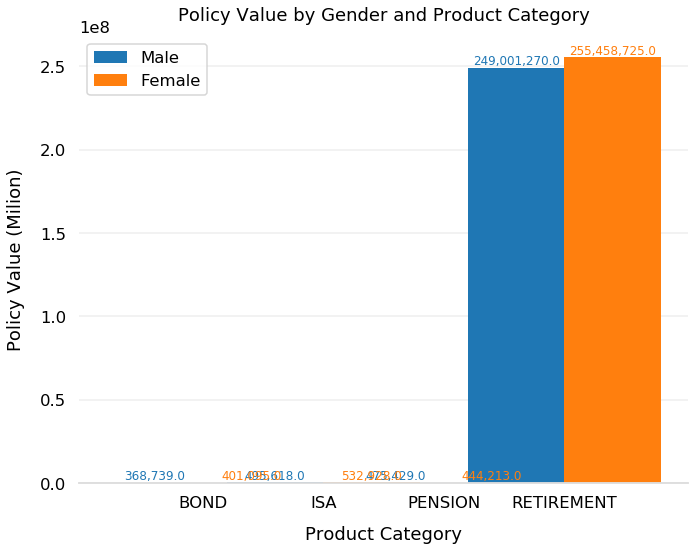

In [487]:
# Create a grouped bar chart, with job as the x-axis
# and gender as the variable we're grouping on so there
# are two bars per job.
fig, ax = plt.subplots(figsize=(10, 8))

# Our x-axis. We basically just want a list
# of numbers from zero with a value for each
# of our jobs.
x = np.arange(len(df_pVal.Product_Category.unique()))

# Define bar width. We need this to offset the second bar.
bar_width = 0.8

b1 = ax.bar(x, df_pVal.loc[df_pVal['Gender'] == 'Male', 'Policy_Value'],
            width=bar_width, label='Male')
# Same thing, but offset the x.
b2 = ax.bar(x + bar_width, df_pVal.loc[df_pVal['Gender'] == 'Female', 'Policy_Value'],
            width=bar_width, label='Female')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(df_pVal.Product_Category.unique())

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Product Category', labelpad=15)
ax.set_ylabel('Policy Value (Milion)', labelpad=15)
ax.set_title('Policy Value by Gender and Product Category', pad=15)

fig.tight_layout()

fig.tight_layout()

# For each bar in the chart, add a text label.
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)


###### Look at Product by Policy Value -  observations:

1. Even Policy value for Retirement is higher than any other product.
2. Annuity, Bond, ISA and Pension which have very less Policy Value


In [526]:
df= pd.read_sql('SELECT C.Age, P.[Policy Value] as Policy_Value FROM Customer_Table C INNER JOIN Policy_Table P on P.[Customer ID]=C.[Customer ID] ', conn)

df["Policy_Value"].replace(np.nan, 0, inplace=True)

df = df[df['Policy_Value']>0]

df

,Age,Policy_Value
0,90,744154.0
2,90,192389.0
3,90,904394.0
5,90,805735.0
6,90,605286.0
...,...,...
1630,22,7176.0
1631,22,533501.0
1632,22,280107.0
1633,20,6740.0


Total Row :  1513


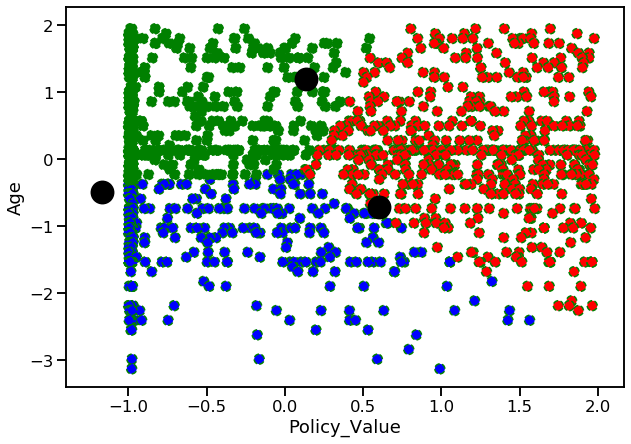

In [556]:
dfa= pd.read_sql('SELECT C.Age, P.[Policy Value] as Policy_Value FROM Customer_Table C INNER JOIN Policy_Table P on P.[Customer ID]=C.[Customer ID] ', conn)

dfa["Policy_Value"].replace(np.nan, 0, inplace=True)

dfa = dfa[dfa['Policy_Value']>0]

dfa

print('Total Row : ', len(dfa))

## Feature Scaling
sc_dfa = StandardScaler()
dfa_std = sc_dfa.fit_transform(dfa.astype(float))

## Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(dfa_std)
labels = kmeans.labels_

new_dfa = pd.DataFrame(data = dfa_std, columns = ['Age','Policy_Value'])
new_dfa['label_kmeans'] = labels
fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(new_dfa["Policy_Value"][new_dfa["label_kmeans"] == 0], new_dfa["Age"][new_dfa["label_kmeans"] == 0], 
            color = "blue", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["Policy_Value"][new_dfa["label_kmeans"] == 1], new_dfa["Age"][new_dfa["label_kmeans"] == 1], 
            color = "red", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["Policy_Value"][new_dfa["label_kmeans"] == 2], new_dfa["Age"][new_dfa["label_kmeans"] == 2], 
            color = "green", s=100, edgecolor='green',linestyle='--')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
ax.set_xlabel('Policy_Value')
ax.set_ylabel('Age')
plt.show()

In [557]:
new_dfa

,Age,Policy_Value,label_kmeans
0,1.947941,1.217732,1
1,1.947941,-0.425299,2
2,1.947941,1.694890,1
3,1.947941,1.401106,1
4,1.947941,0.804214,1
...,...,...,...
1508,-2.987341,-0.976821,0
1509,-2.987341,0.590455,0
1510,-2.987341,-0.164095,0
1511,-3.132497,-0.978119,0


###### Customer Segmentation

Customer segemetation done in three categories based on Age and Policy value.


###### Few important analysis needs to be done

1. Customer who have more than one policy.
2. Customer who have two or more policy.
3. Customer who have two or more different policy.
